# Loan Approval Analysis – Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

## Load Dataset

In [3]:
df = pd.read_csv('loan_sanction_test.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Dataset Information

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


(367, 12)

## Missing Values

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## Handle Missing Values

In [6]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

## Summary Statistics

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


#  Data Card

### Dataset Name
Loan Approval Dataset

### Dataset Description
This dataset contains information related to home loan applicants. It includes demographic details, financial attributes, and loan-related variables used to analyze patterns and trends in loan approval behavior. The dataset is intended for **Exploratory Data Analysis (EDA)** and visualization purposes.

### Number of Records
- **Total Rows:** 367
- **Total Columns:** 12

### Feature Information

| Column Name           | Data Type     | Description |
|----------------------|--------------|-------------|
| Gender               | Categorical  | Gender of the applicant |
| Married              | Categorical  | Marital status of the applicant |
| Dependents           | Categorical  | Number of dependents |
| Education            | Categorical  | Applicant's education level |
| Self_Employed        | Categorical  | Employment type |
| ApplicantIncome      | Numerical    | Income of the primary applicant |
| CoapplicantIncome    | Numerical    | Income of the co-applicant |
| LoanAmount           | Numerical    | Loan amount requested (in thousands) |
| Loan_Amount_Term     | Numerical    | Loan repayment term (in months) |
| Credit_History       | Numerical    | Credit history (1 = good, 0 = bad) |
| Property_Area        | Categorical  | Area where property is located |
| Loan_ID              | Categorical  | Unique loan identifier |

### Missing Values Summary
- **LoanAmount** → Missing values handled using median imputation  
- **Loan_Amount_Term** → Missing values handled using mode  
- **Credit_History** → Missing values handled using mode  

No rows were dropped during cleaning to preserve dataset size.


## Univariate Analysis

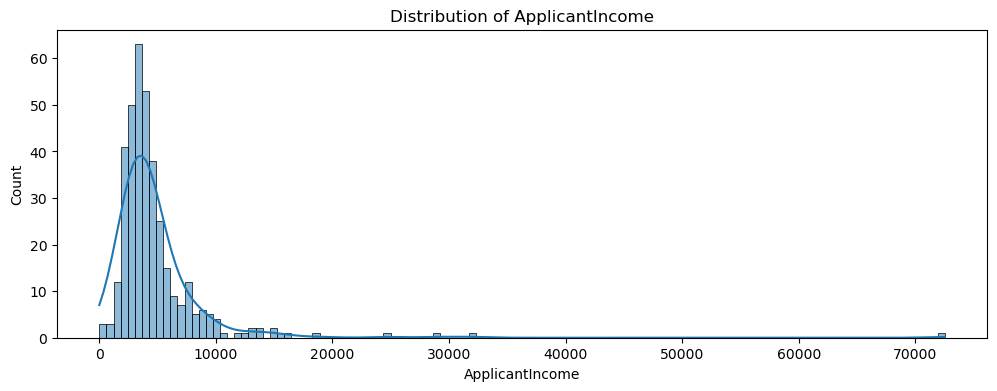

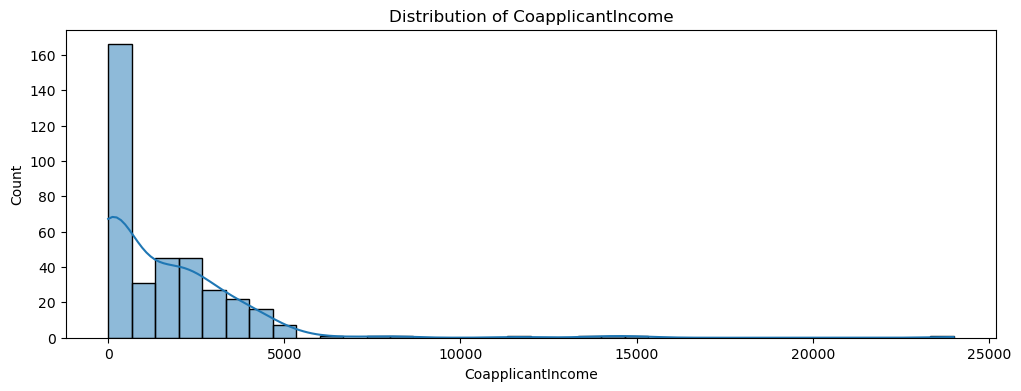

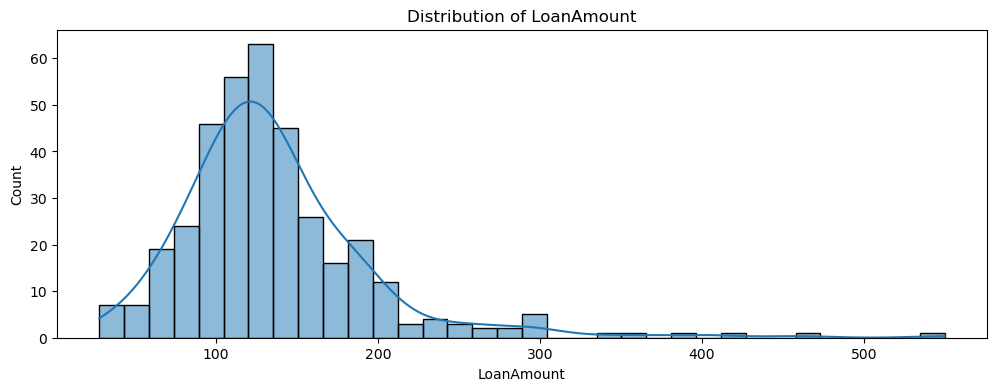

In [8]:
numeric_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for col in numeric_cols:
    plt.figure(figsize=(12,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

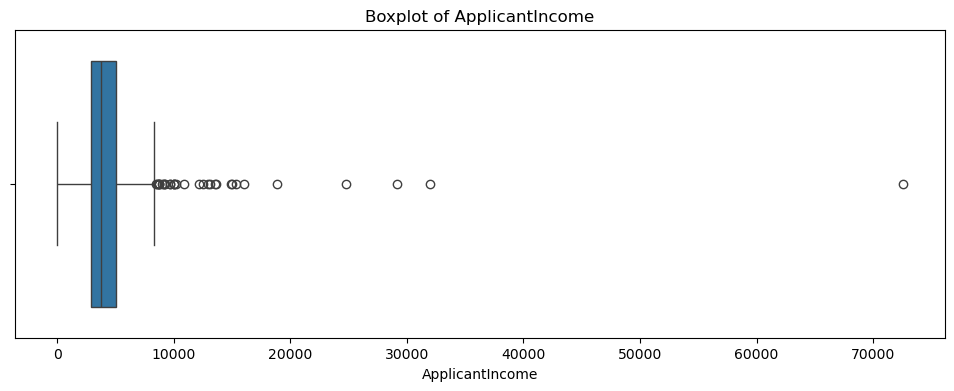

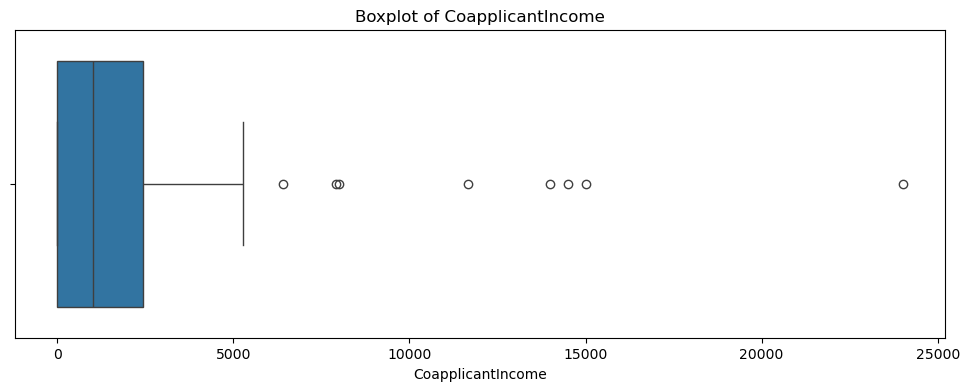

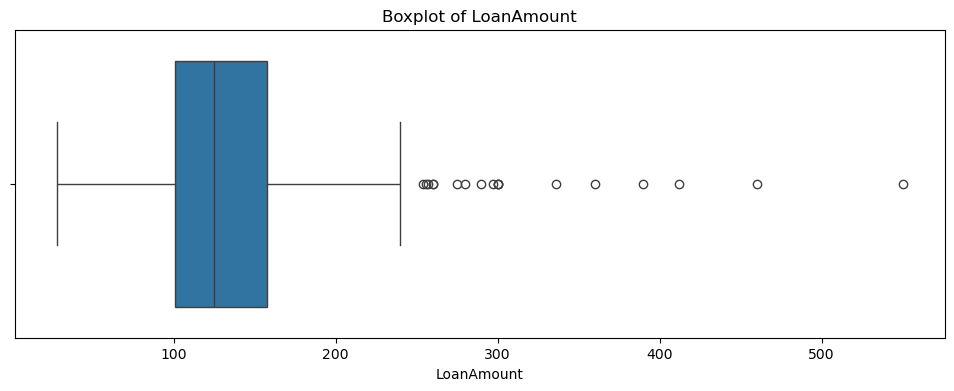

In [9]:
for col in numeric_cols:
    plt.figure(figsize=(12,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


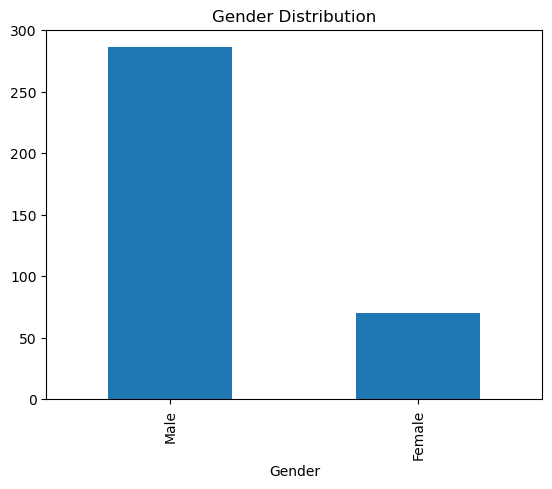

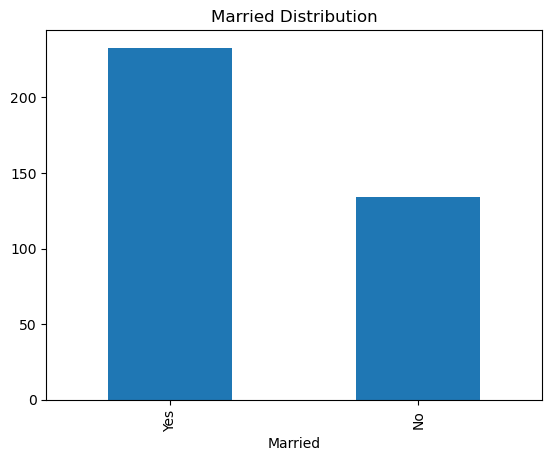

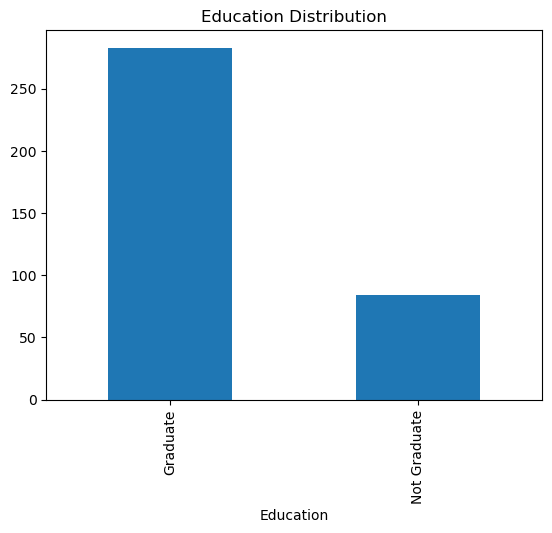

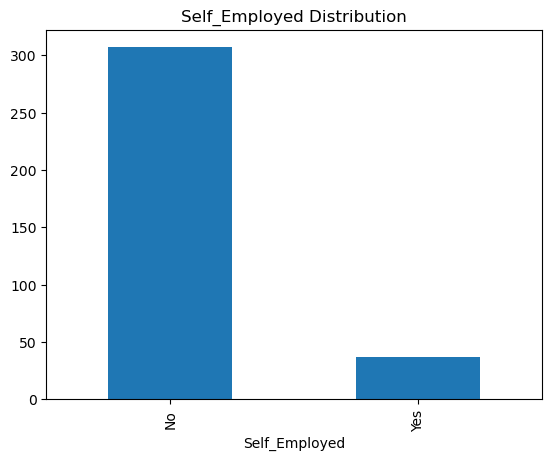

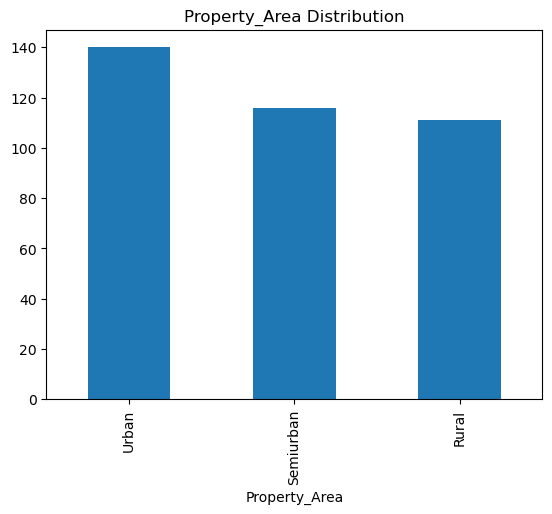

In [10]:
cat_cols = ['Gender','Married','Education','Self_Employed','Property_Area']

for col in cat_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.show()


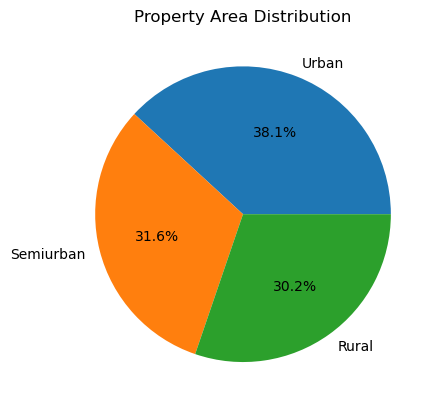

In [11]:
df['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Property Area Distribution')
plt.ylabel('')
plt.show()


## Bivariate Analysis

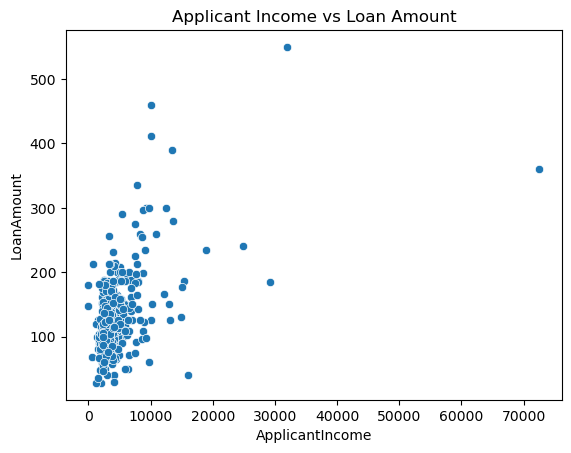

In [12]:
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount')
plt.title('Applicant Income vs Loan Amount')
plt.show()


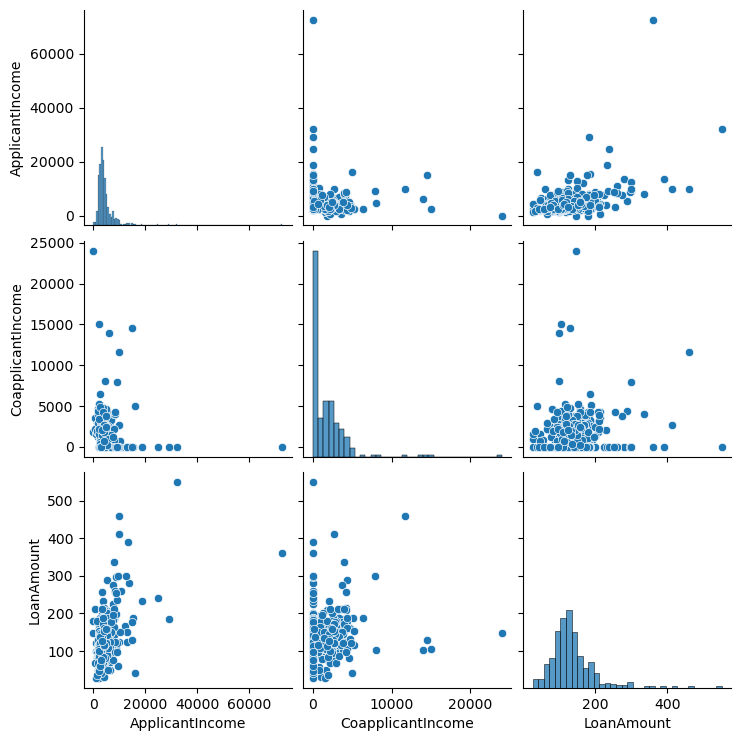

In [13]:
sns.pairplot(df[numeric_cols])
plt.show()

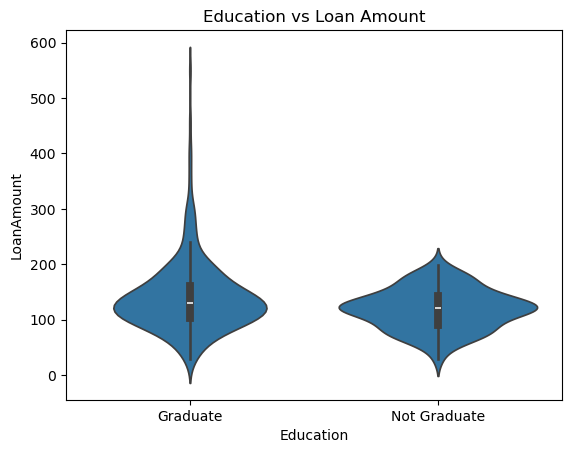

In [14]:
sns.violinplot(data=df, x='Education', y='LoanAmount')
plt.title('Education vs Loan Amount')
plt.show()


## Multivariate Analysis

<Axes: >

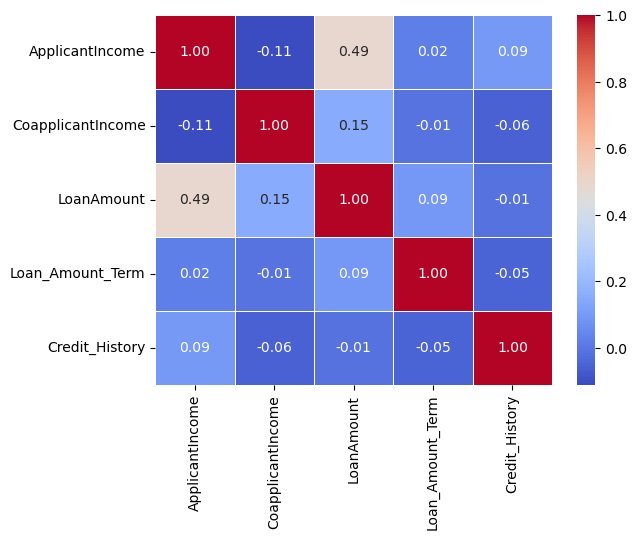

In [16]:
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)


##  Key Insights 

- **ApplicantIncome** shows a **moderate positive correlation** with **LoanAmount**, indicating that applicants with higher income generally apply for higher loan amounts.
- **CoapplicantIncome** has a **weak correlation** with **LoanAmount**, suggesting that loan decisions are driven more by the primary applicant’s income.
- **Loan_Amount_Term** has **very low correlation** with income and loan amount, implying that loan tenure is mostly standardized and independent of applicant earnings.
- **Credit_History** shows **weak correlation** with income-related features, indicating that credit history is an **independent and crucial eligibility factor** rather than income-driven.
- The **absence of strong negative correlations** suggests no conflicting financial variables in the dataset.
- Overall, **income-related variables influence loan size**, while **credit history and tenure act as independent approval constraints**.



##  Business Conclusion

- Applicants with **higher income capacity** tend to request **larger loan amounts**, increasing exposure for lenders.
- Since **credit history is independent of income**, it should be treated as a **primary risk filter** during loan approval.
- Standardized loan tenure across applicants simplifies repayment planning but limits customization.
- Financial institutions should combine **income strength with credit reliability** for balanced loan approval decisions.